In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x): #Rrandom quadratic palabola equation
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

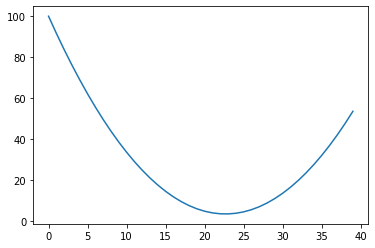

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(ys)

In [17]:
h = 0.0000000001 #the step size for normalization
x = 2/3 #x = 2/3 will be derivative of 0
(f(x+h)-f(x))/h

0.0

Some complex example 

In [18]:
#let get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


In [30]:
h = 0.0001

#inputs 
a = 2.0
b = -3.0
c = 10.0

# k = a * (-3)
# l = a * (-3+.001)

d1 = a*b + c
b += h
d2 = a*b +c
# print(k+10, l+10)
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [64]:
from graphviz import Digraph

def trace(root):
    #building a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graphm create a rectangular (;record;) node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }"% (n.label, n.data, n.grad ), shape='record')
        if n._op:
            #if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label=n._op)
            #and connect ths node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        #connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

In [69]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    #It provide nicer explassion in python by string 
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

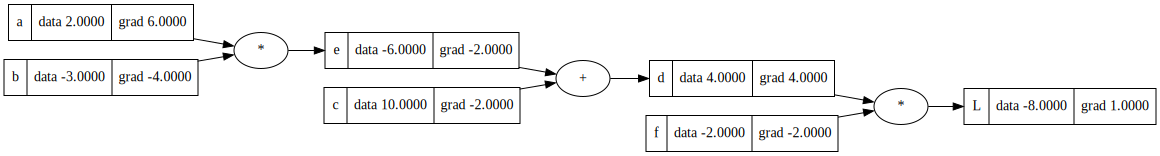

In [88]:
draw_dot(L)

In [ ]:
dd/dc = 1.0
dd/de = 1.0
d = c + e

WANT:
dL/dc = ((dL/dd) * (dd/dc))

KNOW:
dL/dd
dd/dc
-----------
e = a * b 

de / da = -3
de / db = 2

dL/de = dL/de * de/da
-6



In [87]:
d.grad = 4.0
f.grad = -2.0
e.grad = -2.0
c.grad = -2.0
b.grad = -4.0
a.grad = 6.0

In [80]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)
    
lol()

-1.9999999999953388
